In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
DATASET_RATEBEER = 'DATA/RateBeer/'

In [5]:
df_rb_beer = pd.read_csv(DATASET_RATEBEER + 'beers.csv')
df_rb_breweries = pd.read_csv(DATASET_RATEBEER + 'breweries.csv')
df_rb_users = pd.read_csv(DATASET_RATEBEER + 'users.csv')

print('shape of all datasets: \n',
     'beer',df_rb_beer.shape,'\n',
      'users',df_rb_users.shape,'\n',
     'breweries',df_rb_breweries.shape)

shape of all datasets: 
 beer (442081, 14) 
 users (70174, 5) 
 breweries (24189, 4)


Exploration of the three datasets: 

In [4]:
df_rb_beer.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN


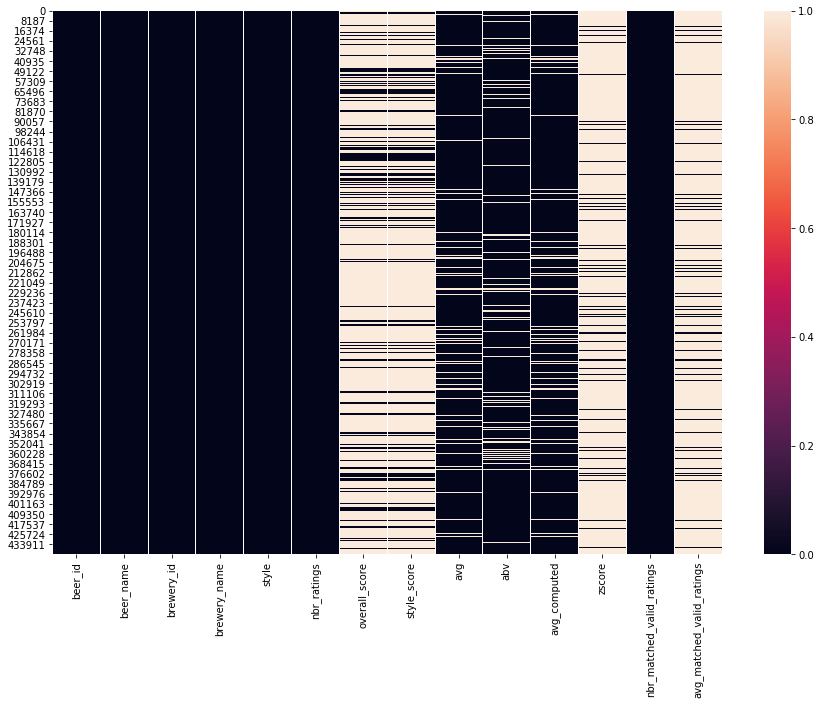

In [5]:
# show in white the nan values in a column
plt.figure(figsize=(15,10))
sns.heatmap(df_rb_beer.isna(), cbar=True)

In [7]:
(df_rb_beer.isna().sum()/df_rb_beer.shape[0]).sort_values(ascending=True)

beer_id                      0.000000
beer_name                    0.000000
brewery_id                   0.000000
brewery_name                 0.000000
style                        0.000000
nbr_ratings                  0.000000
nbr_matched_valid_ratings    0.000000
abv                          0.095218
avg_computed                 0.102676
avg                          0.105012
style_score                  0.764595
overall_score                0.764686
zscore                       0.904479
avg_matched_valid_ratings    0.904479
dtype: float64

In [8]:
df_rb_breweries.head()

,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3
1,13538,Northern Ireland,Ards Brewing Co.,13
2,22304,Northern Ireland,Barrahooley Craft Brewery,4
3,22818,Northern Ireland,Boundary,66
4,24297,Northern Ireland,Brewbot Belfast,3


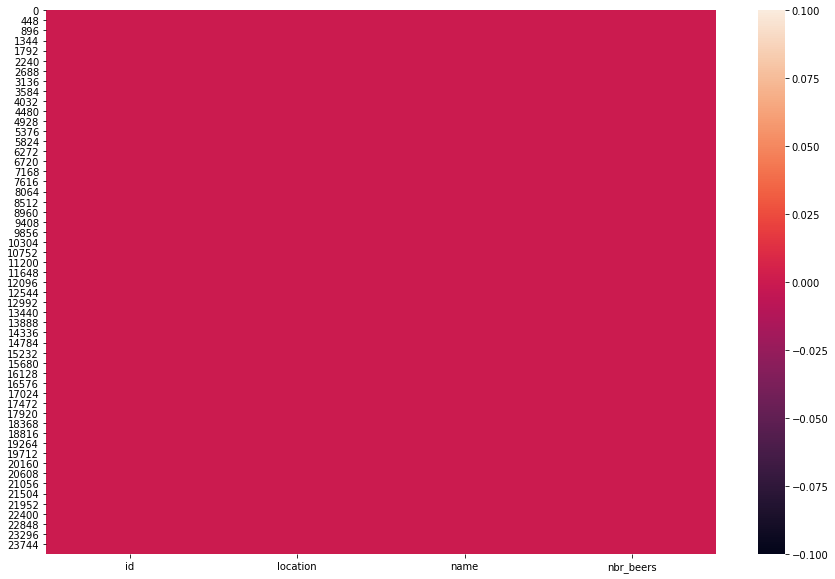

In [10]:
# show in white the nan values in a column
plt.figure(figsize=(15,10))
sns.heatmap(df_rb_breweries.isna(), cbar=True)

In [12]:
(df_rb_breweries.isna().sum()/df_rb_breweries.shape[0]).sort_values(ascending=True)

id           0.0
location     0.0
name         0.0
nbr_beers    0.0
dtype: float64

In [13]:
df_rb_users.head()

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany


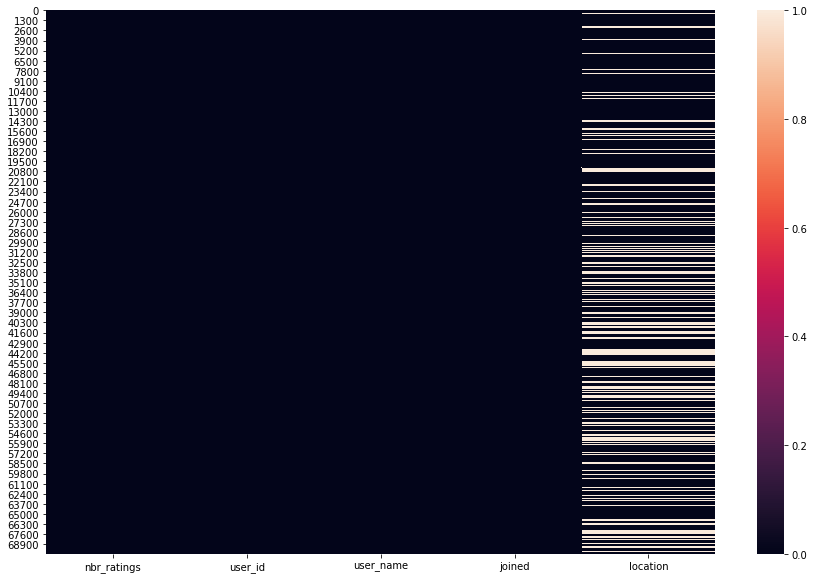

In [14]:
# show in white the nan values in a column
plt.figure(figsize=(15,10))
sns.heatmap(df_rb_users.isna(), cbar=True)

In [15]:
(df_rb_users.isna().sum()/df_rb_users.shape[0]).sort_values(ascending=True)

nbr_ratings    0.000000
user_id        0.000000
user_name      0.000000
joined         0.000428
location       0.279049
dtype: float64

Users stats

In [51]:
df_rb_users.shape

(70174, 5)

In [49]:
df_rb_users["user_id"].nunique() #there are some users that are several times in the dataset.

70120

In [6]:
df_rb_unique_users=df_rb_users.drop_duplicates(subset="user_id",keep="first") #je supprime tous les users id en doublon, mais l'id 46797 a des nombres de review différents selon la ligne
#sanity check 
df_rb_unique_users.shape[0]==df_rb_unique_users["user_id"].nunique()

True

In [17]:
#number of countries the users come from
df_rb_unique_users["location"].nunique()

222

In [29]:
location_users=df_rb_users["location"].value_counts()
#5 locations with the most users 
location_users.head()

Canada                         3255
United States, California      2804
England                        2734
Poland                         1701
United States, Pennsylvania    1632
Name: location, dtype: int64

Text(0, 0.5, 'Number of reviews')

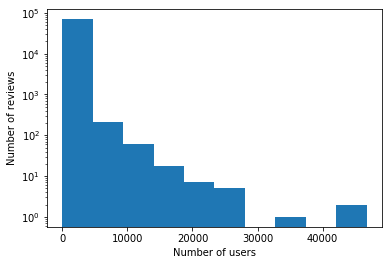

In [4]:
df_rb_users['nbr_ratings'].plot(kind="hist",logx=False,logy=True)
plt.xlabel("Number of users")
plt.ylabel("Number of reviews")

In [7]:
df_rb_unique_users["nbr_ratings"].describe() #faire un boxplot à la place d'un histogramme?

count    70120.000000
mean       108.903936
std        754.777751
min          1.000000
25%          1.000000
50%          2.000000
75%         10.000000
max      46749.000000
Name: nbr_ratings, dtype: float64

In [38]:
#user10 is the number of users having written <10 reviews
#userx_y is the number of users having written x<= nb_reviews < y 
#user10000 is the number of users having written >= 10000 reviews
user10=(df_rb_users['nbr_ratings']<10).sum()
user10_100=(df_rb_users['nbr_ratings']<100).sum()-user10
user100_1000=(df_rb_users['nbr_ratings']<1000).sum()-user10-user10_100
user1000_10000=(df_rb_users['nbr_ratings']<10000).sum()-user10-user10_100-user100_1000
user10000=(df_rb_users['nbr_ratings']>=10000).sum()

print('Number of users with less than 10 reviews: {} '.format(user10))
print('Number of users having written between 10 and 100 reviews: {} '.format(user10_100))
print('Number of users having written between 100 and 1000 reviews: {} '.format(user100_1000))
print('Number of users having written between 1000 and 10000 reviews: {} '.format(user1000_10000))
print('Number of users having written more than 10000 reviews: {} '.format(user10000))

#sanity check

user10+user10_100+user100_1000+user1000_10000+user10000==df_rb_users.shape[0]



Number of users with less than 10 reviews: 52430 
Number of users having written between 10 and 100 reviews: 11325 
Number of users having written between 100 and 1000 reviews: 4753 
Number of users having written between 1000 and 10000 reviews: 1589 
Number of users having written more than 10000 reviews: 77 


True

Breweries stats

In [45]:
df_rb_breweries.head()

,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3
1,13538,Northern Ireland,Ards Brewing Co.,13
2,22304,Northern Ireland,Barrahooley Craft Brewery,4
3,22818,Northern Ireland,Boundary,66
4,24297,Northern Ireland,Brewbot Belfast,3


In [68]:
df_rb_breweries.shape

(24189, 4)

In [19]:
df_rb_breweries['id'].nunique() #good, we have each brewery only once

24189

In [47]:
df_rb_breweries["location"].nunique()

267

In [28]:
location_breweries=df_rb_breweries["location"].value_counts()
#5 locations with the most breweries
location_breweries.head()

England                      2124
Germany                      1999
Italy                        1051
Canada                        884
United States, California     867
Name: location, dtype: int64

It is interesting to see that the 5 locations with the most breweries don't match the 5 locations with the most users. Is it possible to make a plot to see (or not) some sort of correlation? (check that)

In [30]:
location_breweries=location_breweries.to_frame().reset_index()
location_breweries.columns=["country","counts_breweries"]
location_breweries.head()

,country,counts_breweries
0,England,2124
1,Germany,1999
2,Italy,1051
3,Canada,884
4,"United States, California",867


In [31]:
location_users=location_users.to_frame().reset_index()
location_users.columns=["country","counts_users"]
location_users.head()

,country,counts_users
0,Canada,3255
1,"United States, California",2804
2,England,2734
3,Poland,1701
4,"United States, Pennsylvania",1632


In [35]:
location_breweries.shape[0]

267

In [33]:
#want to see if there is a correlation betweenthe ranking of locations of users
#and the ranking of locations of breweries. Need to do so only on locations that match.
compare_locations=location_users.merge(location_breweries,on="country",how="inner")


(207, 3)

In [36]:
compare_locations.head()

,country,counts_users,counts_breweries
0,Canada,3255,884
1,"United States, California",2804,867
2,England,2734,2124
3,Poland,1701,367
4,"United States, Pennsylvania",1632,298


In [38]:
stats.spearmanr(compare_locations["counts_users"],compare_locations["counts_breweries"])

SpearmanrResult(correlation=0.899222149524048, pvalue=1.5492060355213396e-75)

Text(-2.575000000000003, 0.5, 'Counts breweries')

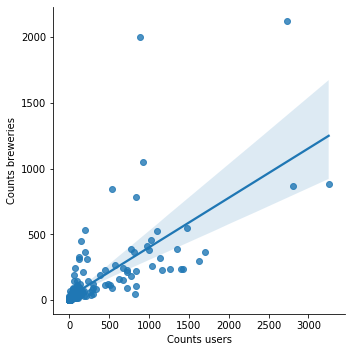

In [42]:
sns.lmplot(x='counts_users',y='counts_breweries', data=compare_locations)
plt.xlabel("Counts users")
plt.ylabel("Counts breweries")

In [31]:
sorted_nbr_beers=df_rb_breweries['nbr_beers'].sort_values(ascending=True)
sorted_nbr_beers.head()

17671    0
16187    0
19106    0
16245    0
16248    0
Name: nbr_beers, dtype: int64

Text(0, 0.5, 'Number of breweries')

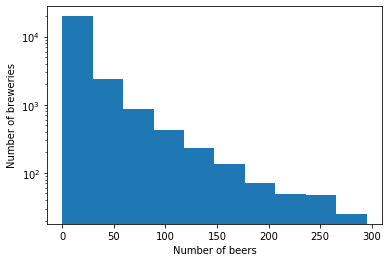

In [29]:
df_rb_breweries['nbr_beers'].plot(kind="hist",logx=False,logy=True)
plt.xlabel("Number of beers")
plt.ylabel("Number of breweries")

Skewed distribution. There is a number of breweries that don't have any beers, drop them? 

In [50]:
df_rb_breweries_wbeer=df_rb_breweries.drop(df_rb_breweries[df_rb_breweries['nbr_beers']==0].index)
df_rb_breweries_wbeer['nbr_beers'].sort_values(ascending=True)
print("{} breweries have been dropped".format((df_rb_breweries.shape[0]-df_rb_breweries_wbeer.shape[0])))



71 breweries have been dropped


In [11]:
df_rb_breweries_wbeer['nbr_beers'].describe()

count    24118.000000
mean        19.078655
std         31.572100
min          1.000000
25%          3.000000
50%          8.000000
75%         20.000000
max        295.000000
Name: nbr_beers, dtype: float64

Text(0, 0.5, 'Number of breweries')

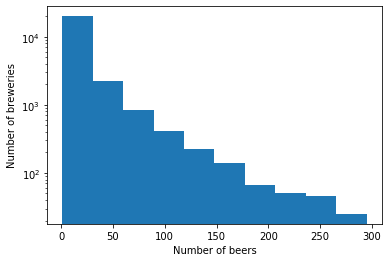

In [12]:
df_rb_breweries_wbeer['nbr_beers'].plot(kind="hist",logx=False,logy=True)
plt.xlabel("Number of beers")
plt.ylabel("Number of breweries") #réfléchir à changer les bins etc

In [14]:
df_rb_beer.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN


In [21]:
df_rb_beer["beer_id"].nunique() #all beers are unique!

442081

In [44]:
df_rb_beer_preprocessed=df_rb_beer.drop(['style_score', 'overall_score','zscore','avg_matched_valid_ratings'],axis=1)                  
(df_rb_beer_preprocessed["nbr_ratings"]==0).sum()


45391

In [45]:
df_rb_beer_preprocessed["nbr_ratings"].shape # there are beers with no ratings, drop them 

(442081,)

In [46]:
df_rb_beer_wrating=df_rb_beer_preprocessed.drop(df_rb_beer_preprocessed[df_rb_beer_preprocessed['nbr_ratings']==0].index)
print("{} beers have been dropped".format((df_rb_beer_preprocessed.shape[0]-df_rb_beer_wrating.shape[0])))

45391 beers have been dropped


In [47]:
df_rb_beer_wrating[["nbr_ratings","avg","abv","avg_computed"]].describe()

,nbr_ratings,avg,abv,avg_computed
count,396690.000000,395647.000000,359958.000000,396690.000000
mean,17.953752,3.026657,6.059846,3.244649
std,85.303131,0.304127,1.928548,0.507520
min,1.000000,0.000000,0.010000,0.500000
25%,1.000000,2.870000,4.800000,3.000000
50%,3.000000,3.020000,5.500000,3.300000
75%,10.000000,3.180000,7.000000,3.594088
max,5272.000000,4.520000,73.000000,5.000000


In [48]:
#look for best beer in each country prior correction 
df_rb_beer_wrating.head()


,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,avg,abv,avg_computed,nbr_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,2.72,5.0,2.000000,0
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,2.18,5.2,1.910000,0
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.83,4.5,1.811111,0
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,3.18,4.6,3.866667,6
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,2.79,4.2,3.000000,0


In [57]:
#preprocessing step: need to add a column matching the name of the brewery with its location 
location_to_brewery_name=dict(zip(df_rb_breweries_wbeer.name,df_rb_breweries_wbeer.location)) #create a dictionary which keys are the breweries name and values are the breweries location
df_rb_beer_wrating["location"]=df_rb_beer_wrating.brewery_name.map(location_to_brewery_name) #create a new location column indicating the location of the brewery
df_rb_beer_wrating.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,avg,abv,avg_computed,nbr_matched_valid_ratings,location
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,2.72,5.0,2.000000,0,Gabon
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,2.18,5.2,1.910000,0,Gabon
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.83,4.5,1.811111,0,Gabon
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,3.18,4.6,3.866667,6,Northern Ireland
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,2.79,4.2,3.000000,0,Northern Ireland


In [58]:
df_rb_beer_wrating.sample(10)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,avg,abv,avg_computed,nbr_matched_valid_ratings,location
404154,36979,Greyhawk (Copper Dragon) Scotts 1816,4194,Greyhawk &#40;prev Copper Dragon&#41;,Bitter,83,3.09,4.1,3.097590,0,England
262407,490280,Rockn Dough Tangled Up in Blue,30439,Rockn Dough Pizza and Brew Co.,Fruit Beer,1,2.94,5.0,3.000000,0,"United States, Tennessee"
276037,285844,Fairhope Football Saison (2014),15509,Fairhope Brewing Company,Saison,5,2.93,5.4,3.160000,0,"United States, Alabama"
155800,183806,Vintage Rauchweizen 2.0,11232,Vintage Brewing Company,Smoked,2,2.86,NaN,3.200000,0,"United States, Wisconsin"
219431,28568,Red Lion Velvet Elvis Oatmeal Stout,3880,Red Lion Brew Pub & Restaurant,Sweet Stout,2,3.16,5.5,3.500000,0,"United States, New York"
197354,463219,Silver City Das Nachwachter Haus,2385,Silver City Brewery,Schwarzbier,1,3.02,6.4,3.400000,0,"United States, Washington"
43064,440211,Birrificio Timilia Sicilian Strong Ale,21621,Birrificio Timilia,Spice/Herb/Vegetable,1,3.02,7.0,3.400000,0,Italy
266117,275605,Devils Backbone Shandy,10006,Devils Backbone Brewing Company &#40;AB InBev&...,Radler/Shandy,2,2.90,2.9,3.350000,0,"United States, Virginia"
374701,531479,Cromarty Whiteout Raspberry Edition,13847,Cromarty,Session IPA,2,3.19,3.8,3.700000,0,Scotland
379661,19781,WJ King Summer Ale,3235,King Beer,Bitter,11,2.88,4.0,2.954545,0,England


In [62]:
#absolute ranking: 
df_beer_absolute_sorting=df_rb_beer_wrating.sort_values(by="avg_computed",ascending=False).reset_index()
df_beer_absolute_sorting.head(10)

,index,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,avg,abv,avg_computed,nbr_matched_valid_ratings,location
0,105844,335857,GroszDorf EINS,23158,GroszDorf,English Pale Ale,2,NaN,5.7,5.0,0,Brazil
1,122427,503553,QBier.nl Grietje MaïsBlond,30941,QBier.nl,Belgian Ale,2,NaN,5.8,5.0,0,Netherlands
2,355475,125157,Eola School Pale Ale,11752,"Eola School Restaurant, Brewery and Lodge",American Pale Ale,1,NaN,NaN,5.0,0,"United States, Texas"
3,97773,369942,La Litera Hugos English IPA,24905,Cervezas la Litera,India Pale Ale (IPA),1,3.36,5.8,5.0,0,Spain
4,313392,359298,Playalinda Smoked Cherry,21387,Playalinda Brewing Company,Smoked,1,3.36,6.2,5.0,0,"United States, Florida"
5,165449,383741,Black Doubt Dark Mountain Coffee Stout,25476,Black Doubt Brewing Company,Stout,1,NaN,4.6,5.0,0,"United States, California"
6,371408,309347,Wooden Skiff Sunburnt Red IPA,19367,Wooden Skiff Brewing,India Pale Ale (IPA),1,NaN,7.8,5.0,0,"United States, South Carolina"
7,371404,440457,Wooden Skiff,19367,Wooden Skiff Brewing,Kölsch,1,NaN,4.9,5.0,0,"United States, South Carolina"
8,437562,456382,Margot La rêveuse,28982,MARGOT,American Pale Ale,1,3.36,5.5,5.0,0,France
9,309284,213268,Cask & Larder Millions of Peaches,15146,Cask & Larder,Fruit Beer,1,3.07,4.8,5.0,0,"United States, Florida"


In [75]:
#ranking for each country? 
grouped_beer=df_rb_beer_wrating.sort_values(["location",'avg_computed'],ascending=False).groupby('location').head(1)
top_country=df_rb_beer_wrating.sort_values(["location",'avg_computed'],ascending=False).groupby('location').head(1).reset_index(drop=True) #gives top beer for each location! 



In [79]:
#there are 265 locations in this dataset, but there were 267 locations of breweries. Two breweries were not in the beers dataset then ? Check

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,avg,abv,avg_computed,nbr_matched_valid_ratings,location
0,7519,Golden Pilsner (Zimbabwe),1689,Delta Breweries (SABMiller),Pale Lager,19,2.24,3.8,2.173684,0,Zimbabwe
1,12717,Mosi Lager,2338,Zambian Breweries (SABMiller),Pale Lager,56,2.02,4.0,2.046429,0,Zambia
2,534273,Lines Line CE - Citrus Grisette,27770,Lines Brew Co.,Saison,1,3.28,3.5,4.600000,0,Wales
3,41259,Fort Christian Jump Up Stout,5392,Fort Christian Brew Pub,Stout,2,2.79,NaN,3.700000,0,Virgin Islands (U.S.)
4,457911,Cooper Island Best Bitter,29038,Cooper Island Brewing Co,Premium Bitter/ESB,1,NaN,NaN,3.500000,0,Virgin Islands (British)
...,...,...,...,...,...,...,...,...,...,...,...
260,148374,N´gola Cerveja Superior,2570,Cervejas de Angola (Heineken),Pale Lager,1,2.70,5.0,2.400000,0,Angola
261,372389,Trapella,27934,La Birreria,Porter,7,3.25,6.0,3.428571,0,Andorra
262,48016,Schems Bavaroise,6000,S.N.B. (Castel Algérie),Pale Lager,4,2.63,4.5,2.450000,0,Algeria
263,440920,Kaltenbeer Gruri Blek,28059,Albion Brauhaus 1.0 - Kaltenbeer,Dunkelweizen,2,3.18,5.0,3.650000,0,Albania


In [82]:
#now that we have top beers for each country, rank countries 
top_ranked_country=top_country.sort_values(by="avg_computed",ascending=False).reset_index()
top_ranked_country
#how do we deal with equalities? 

,index,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,avg,abv,avg_computed,nbr_matched_valid_ratings,location
0,55,453045,Black Shirt 4th Anniversary Quad,15377,Black Shirt Brewing Company,Abt/Quadrupel,1,3.36,9.5,5.000000,0,"United States, Colorado"
1,28,257631,Hoots Lager,19119,Hoots Roller Bar & Beer Company,Pale Lager,1,3.07,5.4,5.000000,0,"United States, North Carolina"
2,30,315978,Tractor Brewing Berry Cider,3764,Tractor Brewing Company,Cider,1,3.07,8.0,5.000000,0,"United States, New Mexico"
3,255,234327,Murrays / Frankies The Beer Monster BBQ,6502,Murrays Craft Brewing Co.,Brown Ale,1,NaN,8.0,5.000000,0,Australia
4,209,533174,Old Town Artisan Project #26: Green Hop Pale ...,30669,Old Town Brewery,American Pale Ale,1,NaN,5.5,5.000000,0,England
...,...,...,...,...,...,...,...,...,...,...,...,...
260,146,213993,Beaufort (Mali),2596,Bramali (BGI),Pale Lager,4,2.29,4.6,1.700000,0,Mali
261,81,9912,Halala 30,1771,Swaziland Brewers,Pale Lager,2,2.17,4.5,1.700000,0,Swaziland
262,155,115129,Brau Zero,11160,Abou Atni,Low Alcohol,5,2.27,NaN,1.680000,0,Libya
263,61,76211,Barbican Premium Malt,8795,Aujan Industries Co.,Low Alcohol,177,1.50,NaN,1.471751,0,United Arab Emirates


In [88]:
test_abv=df_rb_beer_wrating.dropna(axis=0,subset=["abv","avg_computed"])
stats.pearsonr(test_abv.abv,test_abv.avg_computed)


,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,avg,abv,avg_computed,nbr_matched_valid_ratings,location
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,2.72,5.0,2.000000,0,Gabon
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,2.18,5.2,1.910000,0,Gabon
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.83,4.5,1.811111,0,Gabon
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,3.18,4.6,3.866667,6,Northern Ireland
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,2.79,4.2,3.000000,0,Northern Ireland
...,...,...,...,...,...,...,...,...,...,...,...
442072,153089,Stela Double Malt Strong Beer,1107,Stefani & Co,Imperial Pils/Strong Pale Lager,7,2.62,6.0,2.457143,0,Albania
442073,153086,Stela Krudo,1107,Stefani & Co,Wheat Ale,1,2.77,4.8,2.900000,0,Albania
442074,220722,Stela Pils,1107,Stefani & Co,Pale Lager,18,1.93,5.0,1.727778,0,Albania
442075,287791,Stela Pils 4%,1107,Stefani & Co,Pilsener,17,1.92,4.0,1.705882,0,Albania


In [94]:
test_abv.abv.max()

73.0

(0.0, 80)

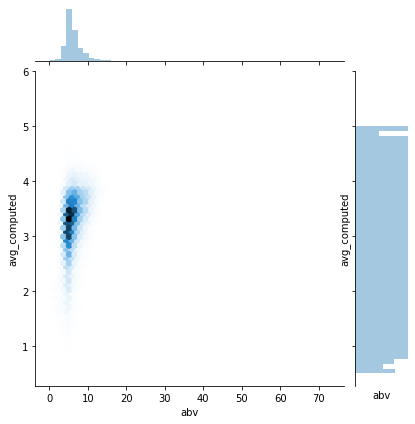

In [96]:
sns.jointplot(x=test_abv.abv,y=test_abv.avg_computed, kind="hex") #met énormément de temps à tourner
plt.xlabel("abv")
plt.ylabel("avg_computed")
plt.ylim(top=6)
plt.xlim(right=80) #je voulais faire un lmplot mais la visualisation était pourrie. J'ai fait ça pour voir la visualisation hexagonale mais c'est pas terrible